In [5]:
print(df.columns)


Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


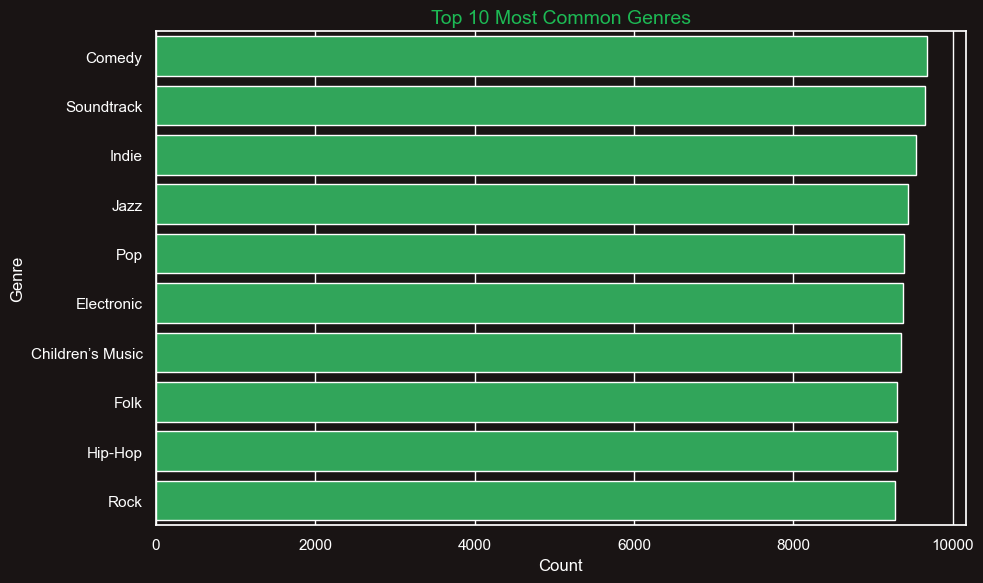

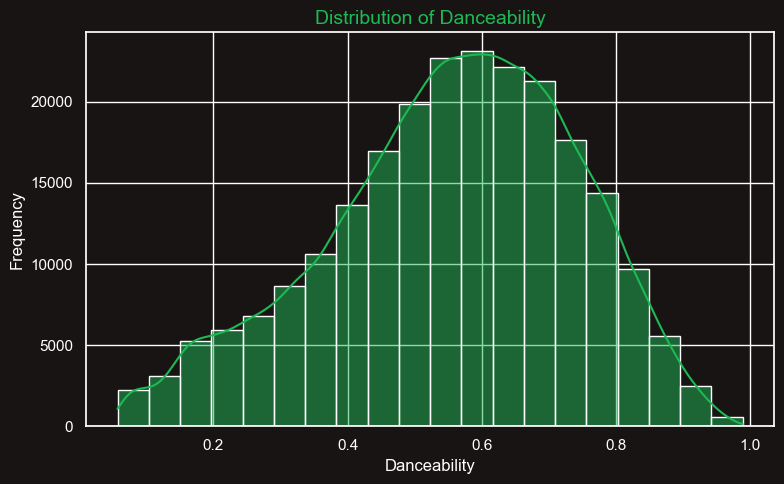

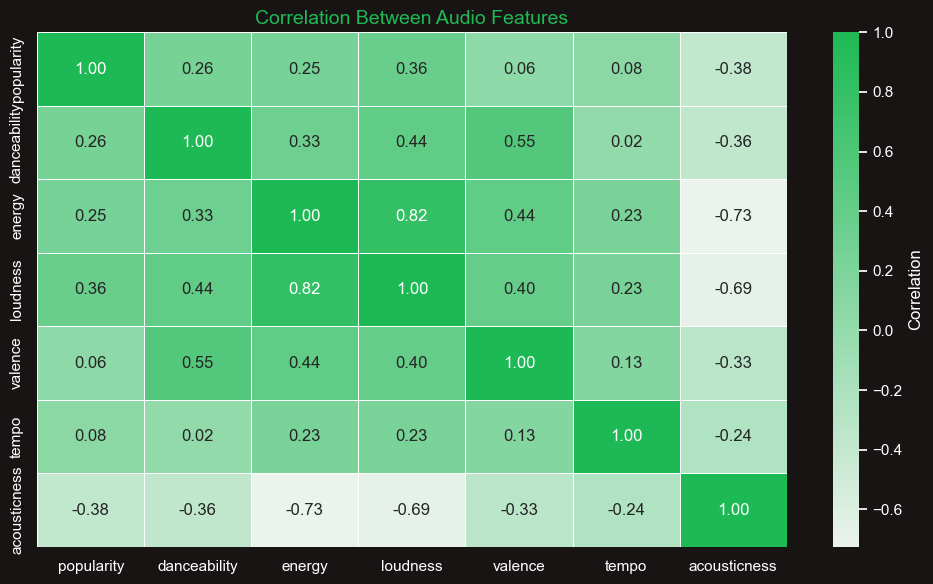

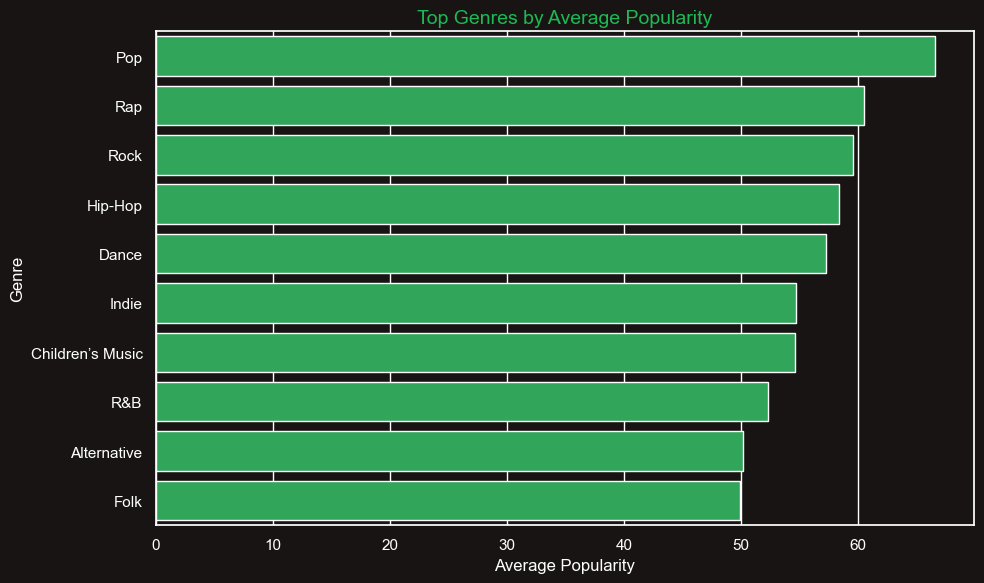

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Spotify-inspired colors
spotify_green = "#1DB954"
spotify_black = "#191414"
spotify_gray = "#B3B3B3"

sns.set(style="darkgrid", rc={"axes.facecolor": spotify_black, "figure.facecolor": spotify_black})
plt.rcParams.update({
    "text.color": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "axes.edgecolor": "white",
    "figure.autolayout": True
})

df = pd.read_csv("SpotifyFeatures.csv")

# Genre Count Plot
plt.figure(figsize=(10,6))
sns.countplot(
    y='genre',
    data=df,
    order=df['genre'].value_counts().index[:10],
    palette=[spotify_green]
)
plt.title("Top 10 Most Common Genres", fontsize=14, color=spotify_green)
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

# Danceability Histogram
plt.figure(figsize=(8,5))
sns.histplot(
    df['danceability'],
    bins=20,
    kde=True,
    color=spotify_green
)
plt.title("Distribution of Danceability", fontsize=14, color=spotify_green)
plt.xlabel("Danceability")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Correlation Heatmap
audio_features = df[['popularity', 'danceability', 'energy', 'loudness', 'valence', 'tempo', 'acousticness']]

plt.figure(figsize=(10,6))
sns.heatmap(
    audio_features.corr(),
    annot=True,
    cmap=sns.light_palette(spotify_green, as_cmap=True),
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)
plt.title("Correlation Between Audio Features", fontsize=14, color=spotify_green)
plt.tight_layout()
plt.show()

# Top Genres by Average Popularity
top_avg_pop = df.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x=top_avg_pop.values,
    y=top_avg_pop.index,
    palette=[spotify_green] * 10
)
plt.title("Top Genres by Average Popularity", fontsize=14, color=spotify_green)
plt.xlabel("Average Popularity")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


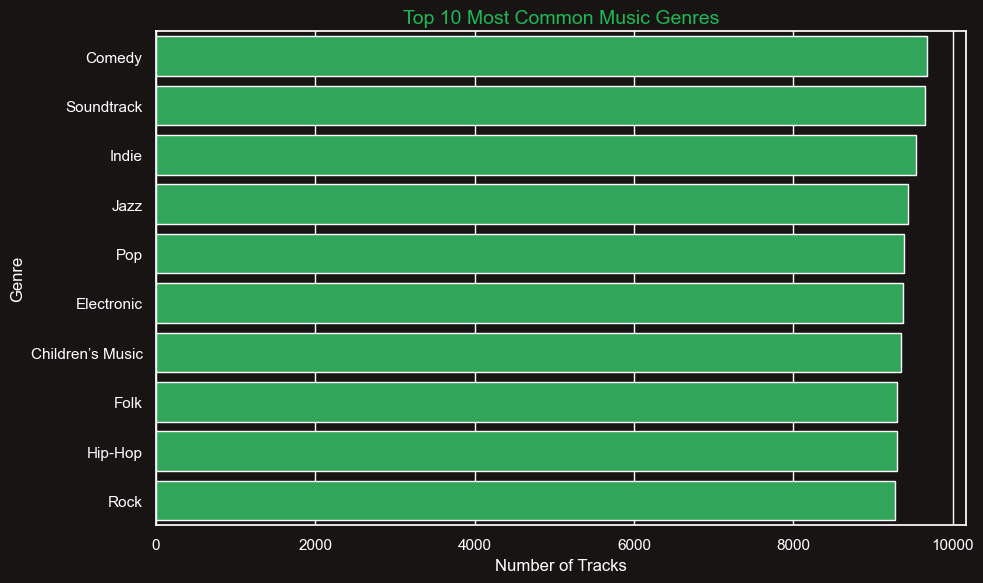

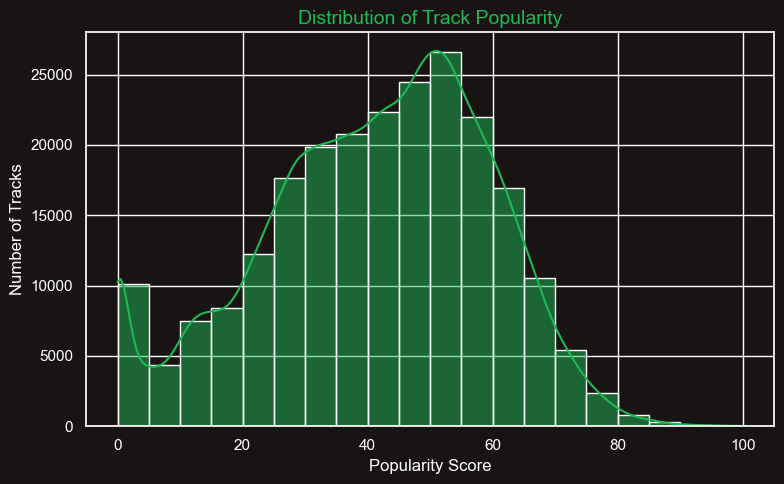

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Spotify color scheme
spotify_green = "#1DB954"
spotify_black = "#191414"

sns.set(style="darkgrid", rc={"axes.facecolor": spotify_black, "figure.facecolor": spotify_black})
plt.rcParams.update({
    "text.color": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "axes.edgecolor": "white",
    "figure.autolayout": True
})

df = pd.read_csv("SpotifyFeatures.csv")

# Task 1 - Bar Chart of Top 10 Genres
top_genres = df['genre'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette=[spotify_green] * 10)
plt.title('Top 10 Most Common Music Genres', fontsize=14, color=spotify_green)
plt.xlabel('Number of Tracks')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# Task 1 - Histogram of Popularity Scores
plt.figure(figsize=(8,5))
sns.histplot(df['popularity'], bins=20, kde=True, color=spotify_green)
plt.title('Distribution of Track Popularity', fontsize=14, color=spotify_green)
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')
plt.tight_layout()
plt.show()


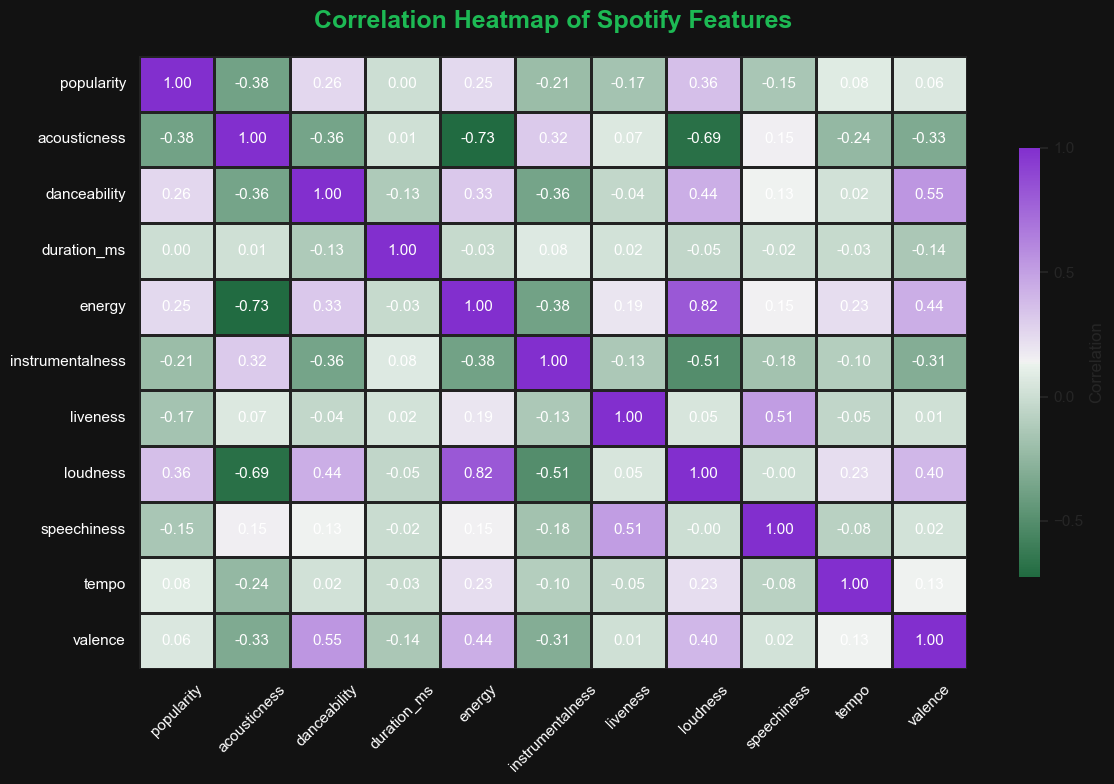

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Spotify dark theme setup
plt.style.use('dark_background')
sns.set_style("darkgrid")
custom_green = '#1DB954'
dark_bg = '#121212'  # Spotify dark background (slightly lighter than pure black)

plt.figure(figsize=(12, 8), facecolor=dark_bg)

# Correlation matrix of numerical features
corr = df.select_dtypes(include='number').corr()

# Greenish diverging palette emphasizing positive and negative correlations
cmap = sns.diverging_palette(140, 280, s=85, l=40, as_cmap=True)

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    linewidths=0.8,
    linecolor='#222222',
    annot_kws={"color": "white", "fontsize": 11},
    cbar_kws={"shrink": 0.7, "ticks": [-1, -0.5, 0, 0.5, 1], "orientation": "vertical", "label": "Correlation"}
)

plt.title('Correlation Heatmap of Spotify Features', fontsize=18, color=custom_green, weight='bold', pad=20)
plt.xticks(rotation=45, fontsize=11, color='white')
plt.yticks(fontsize=11, color='white')
plt.tight_layout()
plt.show()




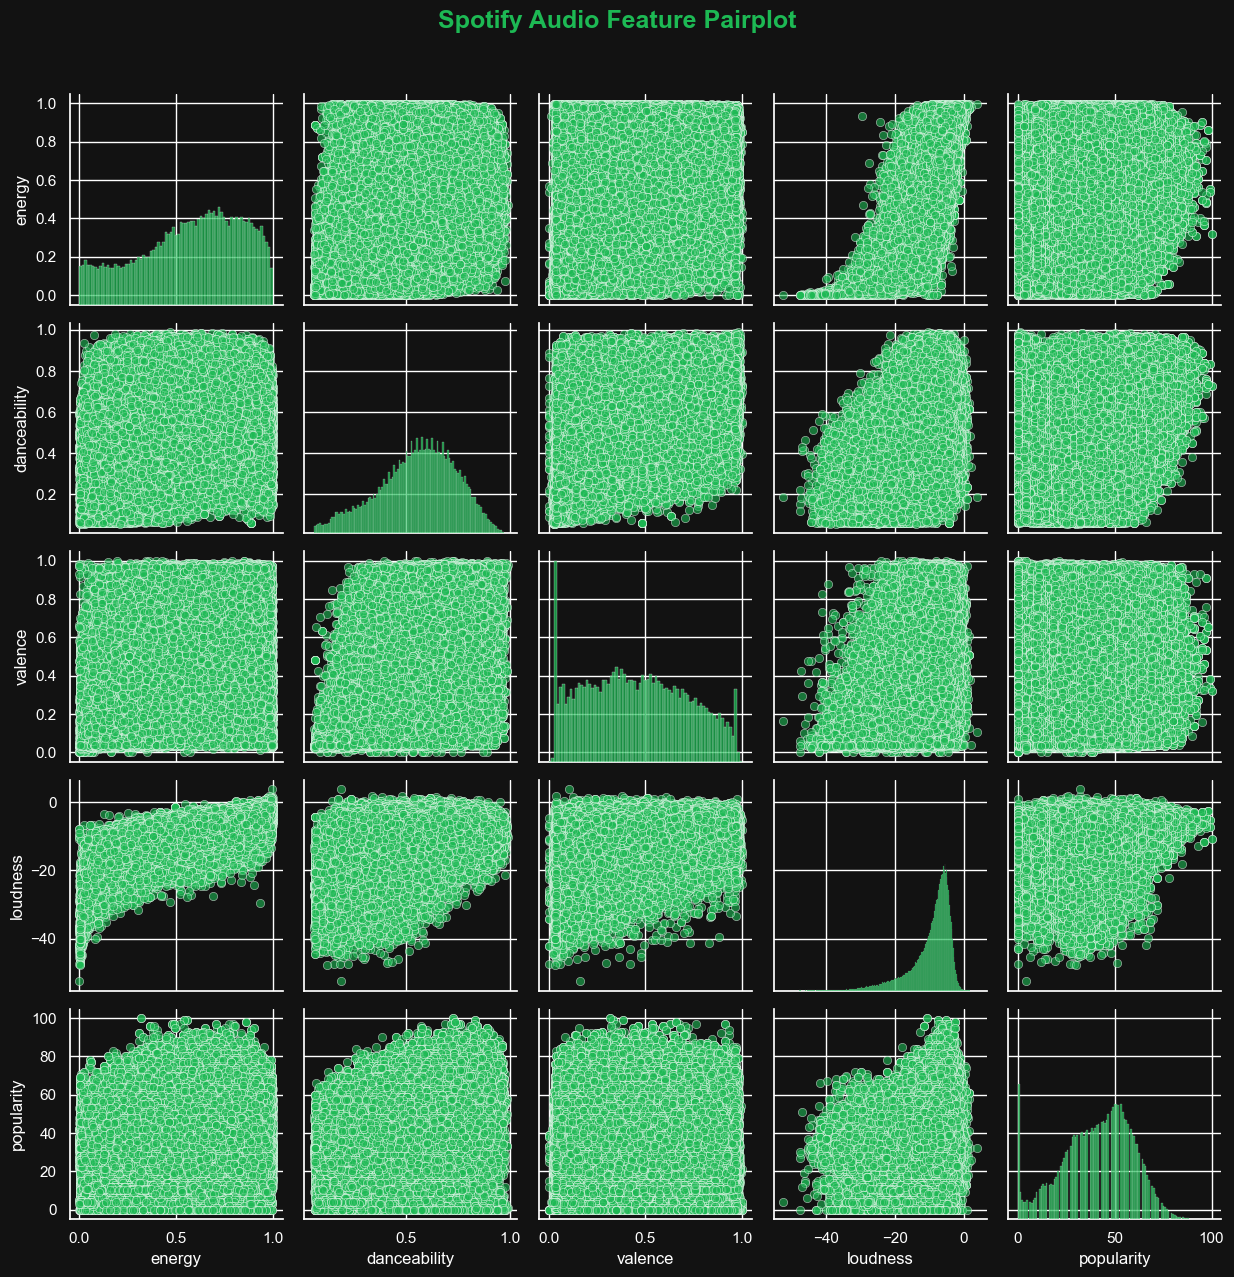

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_green = '#1DB954'
dark_bg = '#121212'

# Set overall style and palette
sns.set_style("darkgrid")
plt.rcParams['axes.facecolor'] = dark_bg
plt.rcParams['figure.facecolor'] = dark_bg
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'

features_to_plot = ['energy', 'danceability', 'valence', 'loudness', 'popularity']

pp = sns.pairplot(
    df[features_to_plot],
    plot_kws={'alpha': 0.6, 'color': custom_green},
    diag_kws={'color': custom_green}
)

pp.fig.suptitle("Spotify Audio Feature Pairplot", y=1.02, fontsize=18, fontweight='bold', color=custom_green)
plt.show()

